# Forest Cover Prediciton

### Problem statement:
The problem statement revolves around the need to predict the forest cover type (the predominant kind of tree cover) from strictly cartographic variables (as opposed to remotely sensed data).

It includes four wilderness areas located in the Roosevelt National Forest of northern Colorado. These areas represent forests with minimal human-caused disturbances, so that existing forest cover types are more a result of ecological processes rather than forest management practices.

The study area includes four wilderness areas located in the Roosevelt National Forest of northern Colorado. Each observation is a 30m x 30m patch. You are asked to predict an integer classification for the forest cover type. The seven types are:

1 - Spruce/Fir
2 - Lodgepole Pine
3 - Ponderosa Pine
4 - Cottonwood/Willow
5 - Aspen
6 - Douglas-fir
7 - Krummholz

In [58]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# Change column display number during print
pd.set_option('display.max_columns', 500)
import matplotlib.pyplot as plt
import matplotlib.style as style # for styling the graphs
#_______________________________________________________________________________________________________________
# style.available (to know the available list of styles)
style.use('ggplot') # chosen style
plt.rc('xtick',labelsize=13) # to globally set the tick size
plt.rc('ytick',labelsize=13) # to globally set the tick size
# To print multiple outputs together
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [42]:
path='./Data/train.csv'
path1='./Data/test.csv'

In [43]:
#train data
train=pd.read_csv(path)
train



,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,2524,2744,96,17,30,-7,458,245,214,92,351,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5
1,13295,2504,103,8,30,6,404,234,230,127,1510,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6
2,4312,2311,30,7,0,0,1230,218,226,143,150,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4
3,10656,2710,191,26,443,-45,1209,210,249,158,939,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
4,868,2802,91,11,540,18,1699,237,223,115,1084,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9067,1955,2847,291,36,743,354,934,101,209,236,1879,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,2
9068,10882,2590,93,24,85,-3,2190,249,194,59,636,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6
9069,7993,3350,214,10,85,0,2623,211,250,174,691,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,7
9070,3436,2110,113,30,60,32,750,254,194,44,90,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4


In [46]:
#test data
test=pd.read_csv(path1)
test

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40
0,6376,2707,28,5,240,8,30,218,230,148,708,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,8962,3401,161,15,361,45,2881,234,242,135,1801,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2,7122,2789,336,20,256,67,1731,172,209,174,1091,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,931,2942,350,9,242,33,5032,203,224,160,1838,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,3678,2311,22,23,127,48,1149,199,184,113,819,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6043,3982,2199,188,24,0,0,932,215,249,155,408,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6044,8524,2584,345,11,30,4,1667,199,223,163,2892,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6045,4332,2241,162,5,0,0,638,224,241,151,569,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6046,4935,2283,101,31,210,86,680,253,182,32,1614,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [48]:
#Reversing the one hot encoding
def reverse_ohe(row):
    for c in Wilderness_Area:
        if row[c]==1:
            return c
Wilderness_Area = ['Wilderness_Area1', 'Wilderness_Area2', 'Wilderness_Area3', 'Wilderness_Area4']
train['Wilderness_Area'] = train[Wilderness_Area].apply(reverse_ohe, axis=1)

test['Wilderness_Area']= test[Wilderness_Area].apply(reverse_ohe, axis=1)
ord_wild={'Wilderness_Area1':1,
         'Wilderness_Area2':2,
         'Wilderness_Area3':3,
         'Wilderness_Area4':4}

train['Wilderness_Area']=train['Wilderness_Area'].map(ord_wild)
test['Wilderness_Area']=test['Wilderness_Area'].map(ord_wild)

train.drop(['Wilderness_Area1','Wilderness_Area2','Wilderness_Area3','Wilderness_Area4'],1,inplace=True)


test.drop(['Wilderness_Area1','Wilderness_Area2','Wilderness_Area3','Wilderness_Area4'],1,inplace=True)

In [49]:
#Reversing the one hot encoding
def reverse_ohe(row):
    for c in Soil_Type:
        if row[c]==1:
            return c
Soil_Type = ['Soil_Type1',
       'Soil_Type2', 'Soil_Type3', 'Soil_Type4', 'Soil_Type5', 'Soil_Type6',
       'Soil_Type7', 'Soil_Type8', 'Soil_Type9', 'Soil_Type10', 'Soil_Type11',
       'Soil_Type12', 'Soil_Type13', 'Soil_Type14', 'Soil_Type15',
       'Soil_Type16', 'Soil_Type17', 'Soil_Type18', 'Soil_Type19',
       'Soil_Type20', 'Soil_Type21', 'Soil_Type22', 'Soil_Type23',
       'Soil_Type24', 'Soil_Type25', 'Soil_Type26', 'Soil_Type27',
       'Soil_Type28', 'Soil_Type29', 'Soil_Type30', 'Soil_Type31',
       'Soil_Type32', 'Soil_Type33', 'Soil_Type34', 'Soil_Type35',
       'Soil_Type36', 'Soil_Type37', 'Soil_Type38', 'Soil_Type39',
       'Soil_Type40',]
train['Soil_Type'] = train[Soil_Type].apply(reverse_ohe, axis=1)
test['Soil_Type'] = test[Soil_Type].apply(reverse_ohe, axis=1)

ord_soil={'Soil_Type1':1,
       'Soil_Type2':2, 'Soil_Type3':3, 'Soil_Type4':4, 'Soil_Type5':5, 'Soil_Type6':6,
       'Soil_Type7':7, 'Soil_Type8':8, 'Soil_Type9':9, 'Soil_Type10':10, 'Soil_Type11':11,
       'Soil_Type12':12, 'Soil_Type13':13, 'Soil_Type14':14, 'Soil_Type15':15,
       'Soil_Type16':16, 'Soil_Type17':17, 'Soil_Type18':18, 'Soil_Type19':19,
       'Soil_Type20':20, 'Soil_Type21':21, 'Soil_Type22':22, 'Soil_Type23':23,
       'Soil_Type24':24, 'Soil_Type25':25, 'Soil_Type26':26, 'Soil_Type27':27,
       'Soil_Type28':28, 'Soil_Type29':29, 'Soil_Type30':30, 'Soil_Type31':31,
       'Soil_Type32':32, 'Soil_Type33':33, 'Soil_Type34':34, 'Soil_Type35':35,
       'Soil_Type36':36, 'Soil_Type37':37, 'Soil_Type38':38, 'Soil_Type39':39,
       'Soil_Type40':40}

train['Soil_Type'] = train['Soil_Type'].map(ord_soil)
test['Soil_Type'] = test['Soil_Type'].map(ord_soil)


train.drop(['Soil_Type1',
       'Soil_Type2', 'Soil_Type3', 'Soil_Type4', 'Soil_Type5', 'Soil_Type6',
       'Soil_Type7', 'Soil_Type8', 'Soil_Type9', 'Soil_Type10', 'Soil_Type11',
       'Soil_Type12', 'Soil_Type13', 'Soil_Type14', 'Soil_Type15',
       'Soil_Type16', 'Soil_Type17', 'Soil_Type18', 'Soil_Type19',
       'Soil_Type20', 'Soil_Type21', 'Soil_Type22', 'Soil_Type23',
       'Soil_Type24', 'Soil_Type25', 'Soil_Type26', 'Soil_Type27',
       'Soil_Type28', 'Soil_Type29', 'Soil_Type30', 'Soil_Type31',
       'Soil_Type32', 'Soil_Type33', 'Soil_Type34', 'Soil_Type35',
       'Soil_Type36', 'Soil_Type37', 'Soil_Type38', 'Soil_Type39',
       'Soil_Type40'],1,inplace=True)

test.drop(['Soil_Type1',
       'Soil_Type2', 'Soil_Type3', 'Soil_Type4', 'Soil_Type5', 'Soil_Type6',
       'Soil_Type7', 'Soil_Type8', 'Soil_Type9', 'Soil_Type10', 'Soil_Type11',
       'Soil_Type12', 'Soil_Type13', 'Soil_Type14', 'Soil_Type15',
       'Soil_Type16', 'Soil_Type17', 'Soil_Type18', 'Soil_Type19',
       'Soil_Type20', 'Soil_Type21', 'Soil_Type22', 'Soil_Type23',
       'Soil_Type24', 'Soil_Type25', 'Soil_Type26', 'Soil_Type27',
       'Soil_Type28', 'Soil_Type29', 'Soil_Type30', 'Soil_Type31',
       'Soil_Type32', 'Soil_Type33', 'Soil_Type34', 'Soil_Type35',
       'Soil_Type36', 'Soil_Type37', 'Soil_Type38', 'Soil_Type39',
       'Soil_Type40'],1,inplace=True)

In [ ]:
data = pd.concat([train, test], axis=0)
data['source'] = np.nan
data['source'].iloc[:train.shape[0]] = "train"
data['source'].iloc[train.shape[0]: ] = "test"
data.drop(['Cover_Type'], axis=1, inplace=True)

print(data.shape)

## Analysis on Wilderness Area column

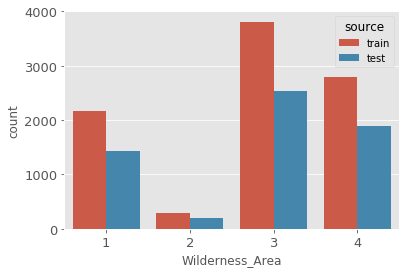

In [59]:
#Wilderness_Area
col='Wilderness_Area'
sns.countplot(data[col],hue=data['source'])

<Figure size 936x720 with 0 Axes>

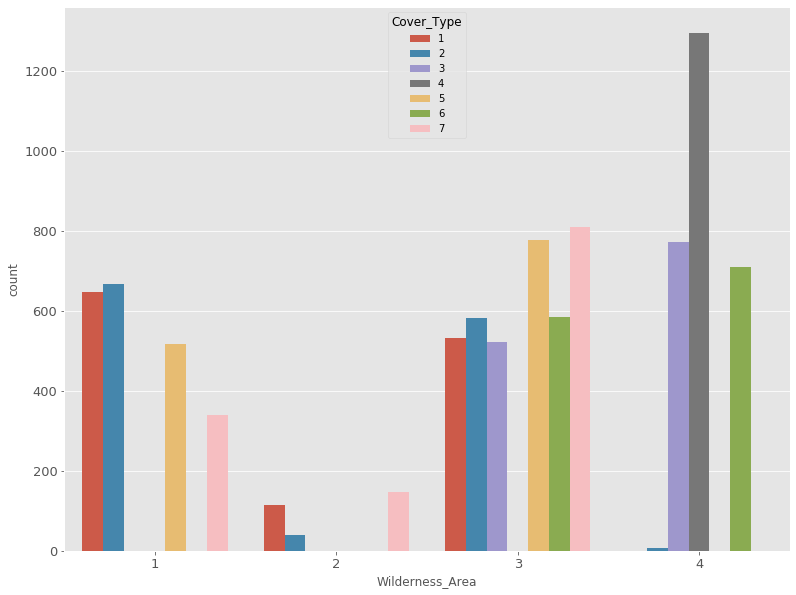

In [62]:
#Bivariate cover type vs wilderness area
plt.figure(figsize=(13,10))
sns.countplot(train['Wilderness_Area'],hue=train['Cover_Type'])

***observations***

1. Wilderness Area 1 has cover type of only Cover type 1, 2,5,7
2. Wilderness Area 2 has only cover type 1,2,7
3. Wilderness Area 3 has only cover type 1,2,3,5,6,7
4. Wilderness area 4 has cover type 3,4,7

 * we can notice that cover type 4 is present only in wilderness area 4. And Cover type 1 and 2 are present only in wilderness area 1 , 2, 3 

## Analysis on Soil Type column

<Figure size 720x360 with 0 Axes>

(array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]), <a list of 6 Text xticklabel objects>)

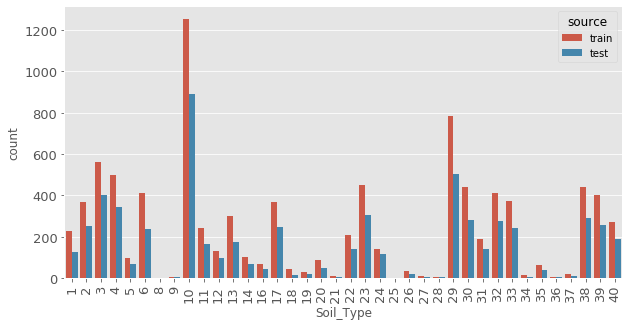

In [65]:
## Analysis on Soil type column
col='Soil_Type'
plt.figure(figsize=(10,5))
plt.xticks(rotation=90)
sns.countplot(data[col],hue=data['source'])

<Figure size 1440x720 with 0 Axes>

(array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]), <a list of 6 Text xticklabel objects>)

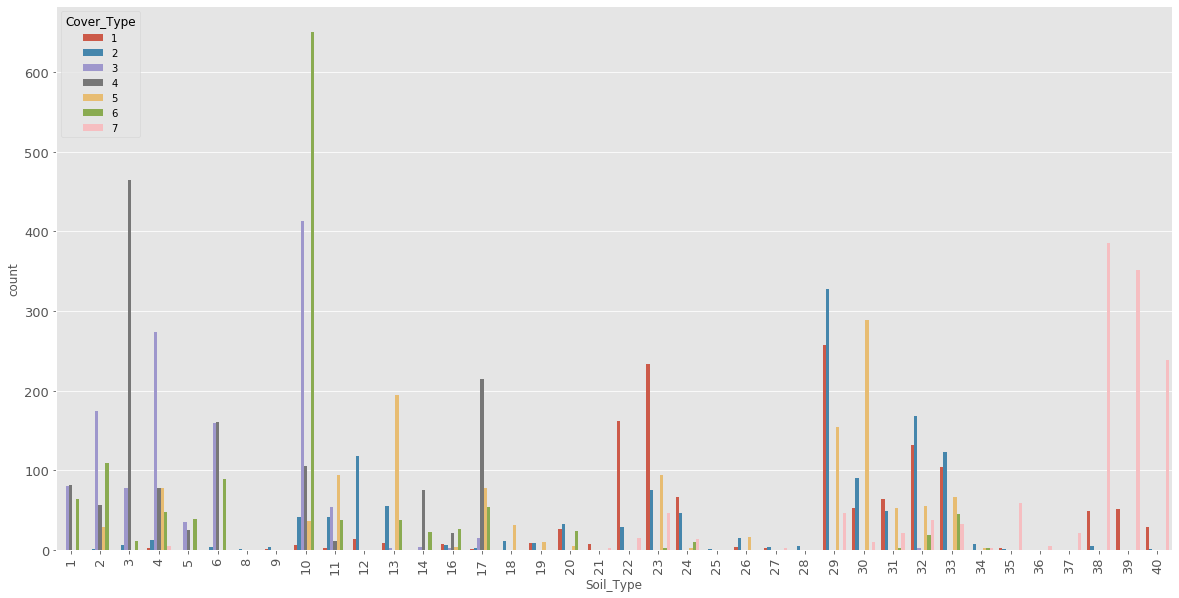

In [67]:
plt.figure(figsize=(20,10))
plt.xticks(rotation=90)
sns.countplot(train[col],hue=train['Cover_Type'])

## Analysis on Elevation Column

<Figure size 720x360 with 0 Axes>

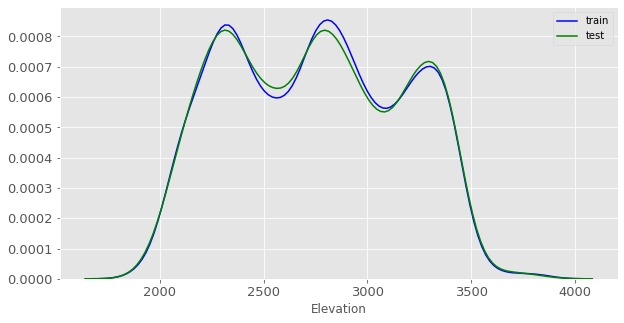

In [69]:
col = 'Elevation'

plt.figure(figsize=(10,5))
sns.distplot(train[col], color='b', label='train', hist=False)
sns.distplot(test[col], color='g', label='test', hist=False)
plt.legend(loc='best')
plt.show()

<Figure size 864x432 with 0 Axes>

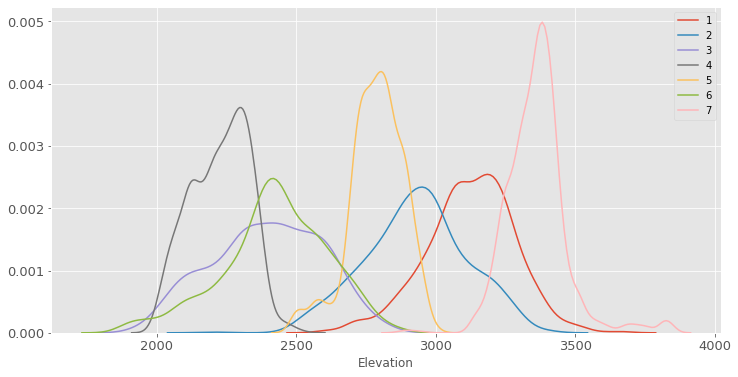

In [73]:
target = 'Cover_Type'
plt.figure(figsize=(12,6))
sns.distplot(train[col][train[target] == 1], label='1' , hist=False)
sns.distplot(train[col][train[target] == 2], label='2' , hist=False)
sns.distplot(train[col][train[target] == 3], label='3' , hist=False)
sns.distplot(train[col][train[target] == 4], label='4' , hist=False)
sns.distplot(train[col][train[target] == 5], label='5' , hist=False)
sns.distplot(train[col][train[target] == 6], label='6' , hist=False)
sns.distplot(train[col][train[target] == 7], label='7' , hist=False)
plt.legend(loc='best')
plt.show()

***observations***

1. Cover type 1 is present between 2500-3500
2. Cover type 2 is present between 2000-3500
3. covertype 3 is present between 1500-3000
4. cover type 4 is present between 2000-2500
5. cover type 5 is present between 2500-3000
6. cover type 6 is present between 3000 - 4000 
7. cover type 7 is present between  2800- 4000

* We can observe that elevation is greater than 3500 we have cover type 1 and 7. cover type 1 ends on 3675 and when elevation is greater than 3675 we have cover type=7

In [90]:
A=train[train['Elevation']>3675]
b=A[A['Cover_Type']==7]
b

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Cover_Type,Wilderness_Area,Soil_Type
443,9717,3842,31,7,1015,393,4685,218,225,143,2744,7,3,40
497,14561,3825,19,12,1062,49,4598,211,214,138,2676,7,3,40
586,9709,3831,346,12,912,382,4867,196,220,163,2934,7,3,40
1641,9710,3827,18,13,1084,51,4628,210,213,138,2704,7,3,40
1980,9664,3731,334,14,987,285,5254,186,220,173,3378,7,3,40
2277,9620,3688,347,12,1213,333,5269,197,221,161,3667,7,3,40
2371,9647,3706,28,6,1129,260,5209,218,228,146,3432,7,3,40
2451,9692,3812,2,16,1018,363,4813,196,208,148,2903,7,3,40
2945,14559,3805,325,19,834,359,5051,169,216,185,3124,7,3,40
3309,9663,3712,322,9,938,266,5463,198,232,173,3577,7,3,40


***Observation***
1. we can observe that for eleavtion greater than 3675 we have soil type,wilderness_area same

## Analysis on aspect  column

<Figure size 720x360 with 0 Axes>

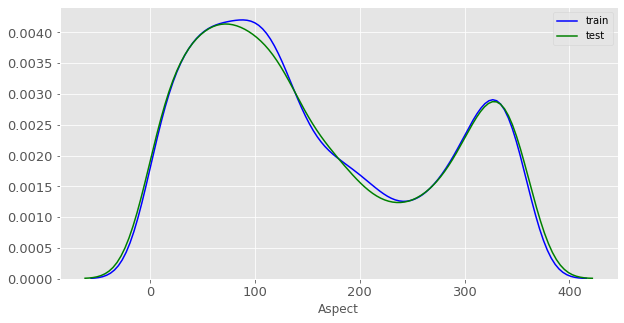

In [91]:
col = 'Aspect'

plt.figure(figsize=(10,5))
sns.distplot(train[col], color='b', label='train', hist=False)
sns.distplot(test[col], color='g', label='test', hist=False)
plt.legend(loc='best')
plt.show()

<Figure size 864x432 with 0 Axes>

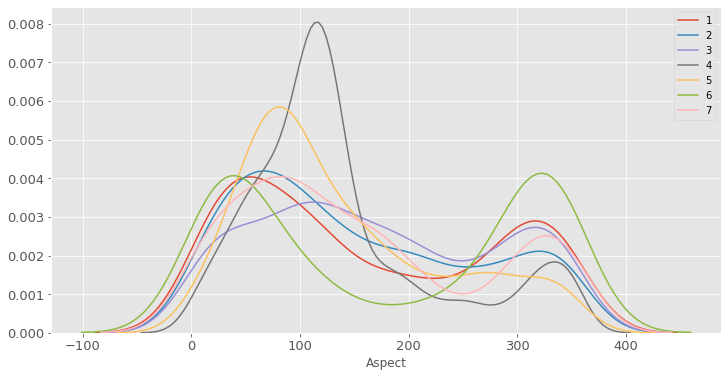

In [92]:
#Bivariate Analysis cover type vs aspect
target = 'Cover_Type'
plt.figure(figsize=(12,6))
sns.distplot(train[col][train[target] == 1], label='1' , hist=False)
sns.distplot(train[col][train[target] == 2], label='2' , hist=False)
sns.distplot(train[col][train[target] == 3], label='3' , hist=False)
sns.distplot(train[col][train[target] == 4], label='4' , hist=False)
sns.distplot(train[col][train[target] == 5], label='5' , hist=False)
sns.distplot(train[col][train[target] == 6], label='6' , hist=False)
sns.distplot(train[col][train[target] == 7], label='7' , hist=False)
plt.legend(loc='best')
plt.show()

## Analysis on Slope column


<Figure size 720x360 with 0 Axes>

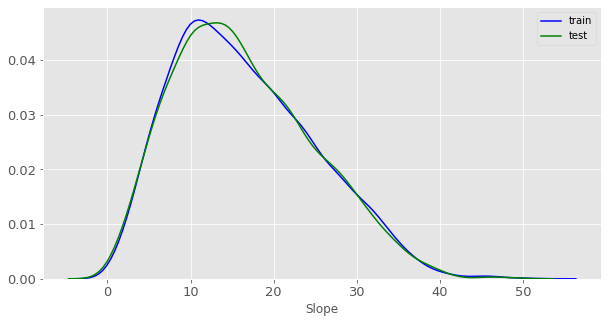

In [93]:
col = 'Slope'

plt.figure(figsize=(10,5))
sns.distplot(train[col], color='b', label='train', hist=False)
sns.distplot(test[col], color='g', label='test', hist=False)
plt.legend(loc='best')
plt.show()

<Figure size 864x432 with 0 Axes>

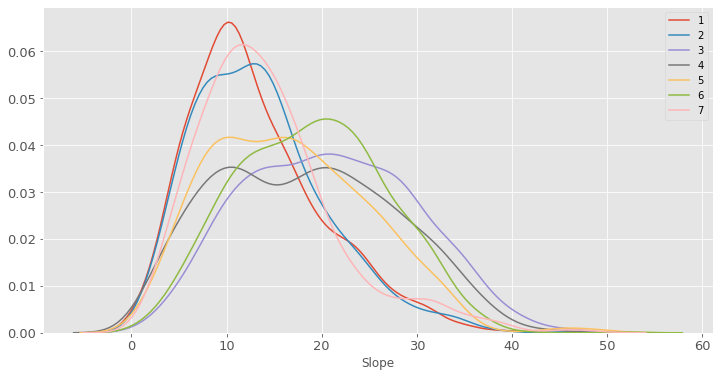

In [94]:
#Bivariate Analysis cover type vs slope
target = 'Cover_Type'
plt.figure(figsize=(12,6))
sns.distplot(train[col][train[target] == 1], label='1' , hist=False)
sns.distplot(train[col][train[target] == 2], label='2' , hist=False)
sns.distplot(train[col][train[target] == 3], label='3' , hist=False)
sns.distplot(train[col][train[target] == 4], label='4' , hist=False)
sns.distplot(train[col][train[target] == 5], label='5' , hist=False)
sns.distplot(train[col][train[target] == 6], label='6' , hist=False)
sns.distplot(train[col][train[target] == 7], label='7' , hist=False)
plt.legend(loc='best')
plt.show()

## Analysis on Horizontal_Distance_To_Hydrology

<Figure size 720x360 with 0 Axes>

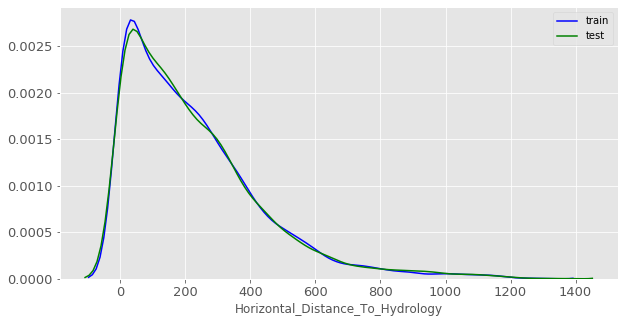

In [95]:
col='Horizontal_Distance_To_Hydrology'


plt.figure(figsize=(10,5))
sns.distplot(train[col], color='b', label='train', hist=False)
sns.distplot(test[col], color='g', label='test', hist=False)
plt.legend(loc='best')
plt.show()

- The values  of this column are skewed it will require some transformation while modelling

<Figure size 864x432 with 0 Axes>

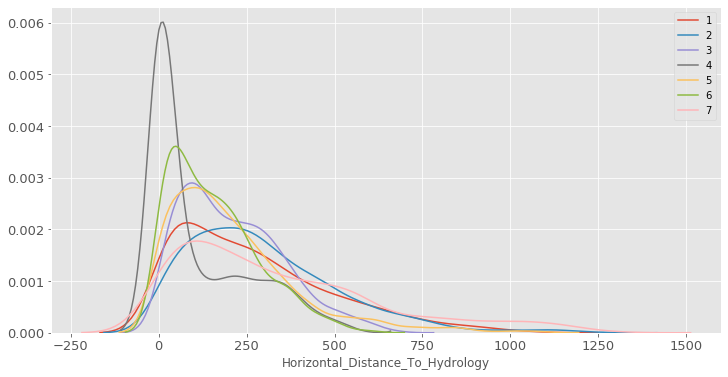

In [96]:
#Bivariate Analysis cover type vs 'Horizontal_Distance_To_Hydrology'
target = 'Cover_Type'
plt.figure(figsize=(12,6))
sns.distplot(train[col][train[target] == 1], label='1' , hist=False)
sns.distplot(train[col][train[target] == 2], label='2' , hist=False)
sns.distplot(train[col][train[target] == 3], label='3' , hist=False)
sns.distplot(train[col][train[target] == 4], label='4' , hist=False)
sns.distplot(train[col][train[target] == 5], label='5' , hist=False)
sns.distplot(train[col][train[target] == 6], label='6' , hist=False)
sns.distplot(train[col][train[target] == 7], label='7' , hist=False)
plt.legend(loc='best')
plt.show()

## Analysis on Vertical Distance to hydrology column

<Figure size 720x360 with 0 Axes>

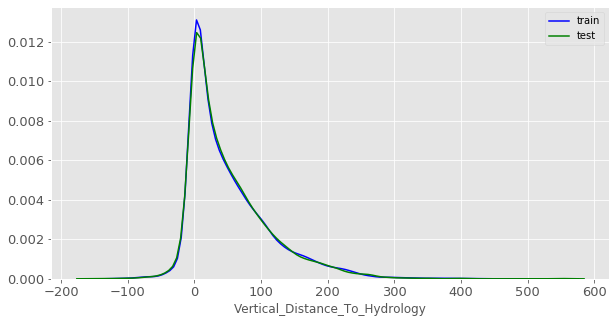

In [97]:
col='Vertical_Distance_To_Hydrology'


plt.figure(figsize=(10,5))
sns.distplot(train[col], color='b', label='train', hist=False)
sns.distplot(test[col], color='g', label='test', hist=False)
plt.legend(loc='best')
plt.show()

<Figure size 864x432 with 0 Axes>

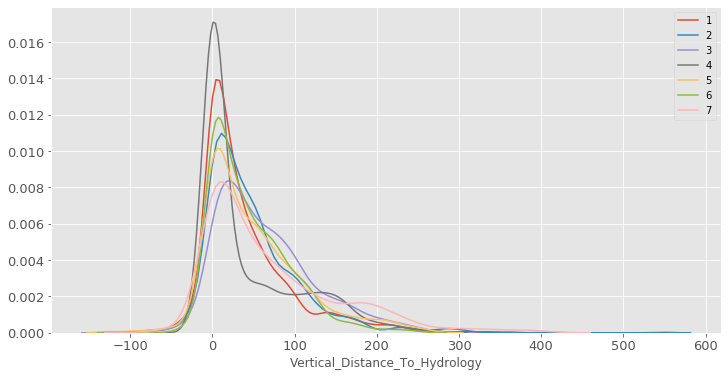

In [98]:
target = 'Cover_Type'
plt.figure(figsize=(12,6))
sns.distplot(train[col][train[target] == 1], label='1' , hist=False)
sns.distplot(train[col][train[target] == 2], label='2' , hist=False)
sns.distplot(train[col][train[target] == 3], label='3' , hist=False)
sns.distplot(train[col][train[target] == 4], label='4' , hist=False)
sns.distplot(train[col][train[target] == 5], label='5' , hist=False)
sns.distplot(train[col][train[target] == 6], label='6' , hist=False)
sns.distplot(train[col][train[target] == 7], label='7' , hist=False)
plt.legend(loc='best')
plt.show()

- The Data in this column is skewed it requires transformation during modelling

## Analysis on Horizontal_Distance_To_Roadways

<Figure size 720x360 with 0 Axes>

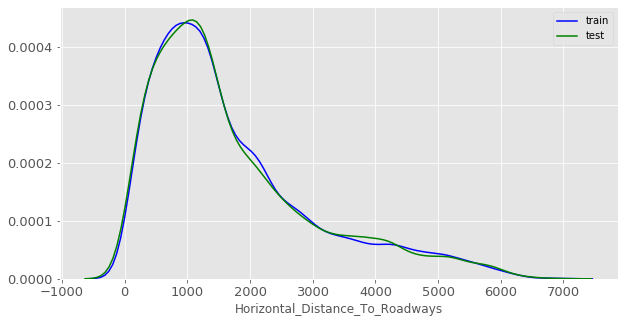

In [100]:
col='Horizontal_Distance_To_Roadways'


plt.figure(figsize=(10,5))
sns.distplot(train[col], color='b', label='train', hist=False)
sns.distplot(test[col], color='g', label='test', hist=False)
plt.legend(loc='best')
plt.show()

- The data in this column is skewed 

<Figure size 864x432 with 0 Axes>

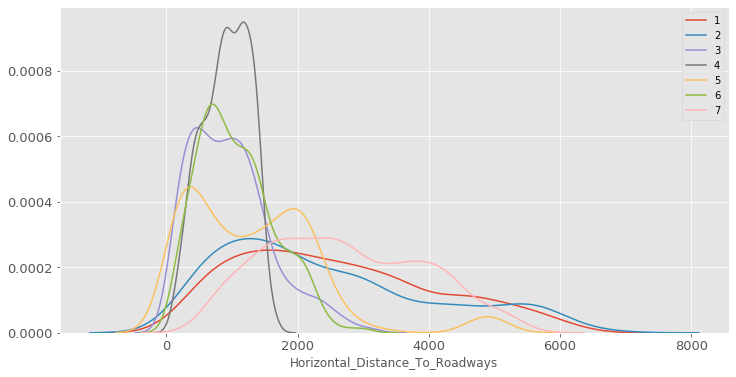

In [101]:
target = 'Cover_Type'
plt.figure(figsize=(12,6))
sns.distplot(train[col][train[target] == 1], label='1' , hist=False)
sns.distplot(train[col][train[target] == 2], label='2' , hist=False)
sns.distplot(train[col][train[target] == 3], label='3' , hist=False)
sns.distplot(train[col][train[target] == 4], label='4' , hist=False)
sns.distplot(train[col][train[target] == 5], label='5' , hist=False)
sns.distplot(train[col][train[target] == 6], label='6' , hist=False)
sns.distplot(train[col][train[target] == 7], label='7' , hist=False)
plt.legend(loc='best')
plt.show()

# Analysis on Hill shade columns

<Figure size 720x360 with 0 Axes>

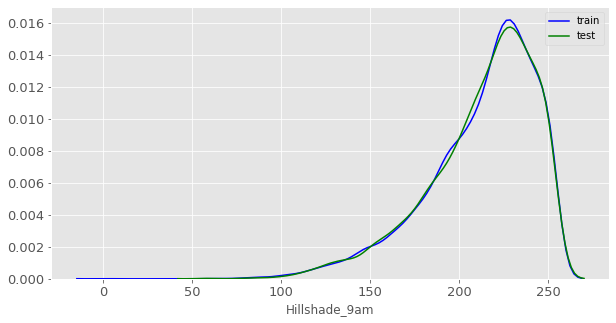

In [102]:
col='Hillshade_9am'


plt.figure(figsize=(10,5))
sns.distplot(train[col], color='b', label='train', hist=False)
sns.distplot(test[col], color='g', label='test', hist=False)
plt.legend(loc='best')
plt.show()

- Data is skewed, requires transformation

<Figure size 864x432 with 0 Axes>

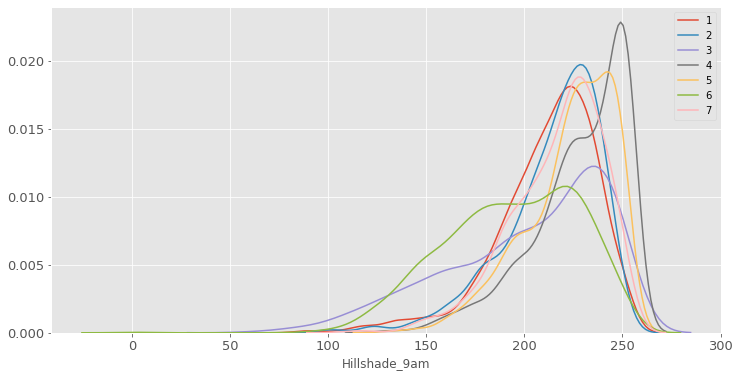

In [103]:
target = 'Cover_Type'
plt.figure(figsize=(12,6))
sns.distplot(train[col][train[target] == 1], label='1' , hist=False)
sns.distplot(train[col][train[target] == 2], label='2' , hist=False)
sns.distplot(train[col][train[target] == 3], label='3' , hist=False)
sns.distplot(train[col][train[target] == 4], label='4' , hist=False)
sns.distplot(train[col][train[target] == 5], label='5' , hist=False)
sns.distplot(train[col][train[target] == 6], label='6' , hist=False)
sns.distplot(train[col][train[target] == 7], label='7' , hist=False)
plt.legend(loc='best')
plt.show()

<Figure size 720x360 with 0 Axes>

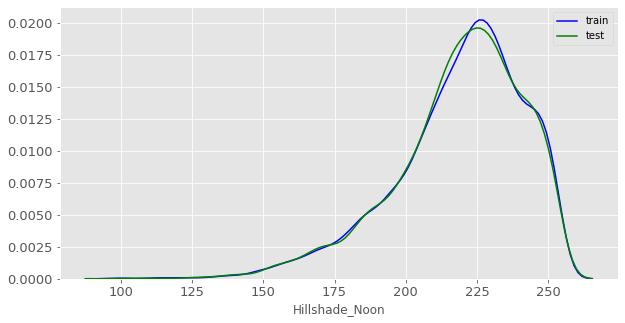

In [104]:
col='Hillshade_Noon'

plt.figure(figsize=(10,5))
sns.distplot(train[col], color='b', label='train', hist=False)
sns.distplot(test[col], color='g', label='test', hist=False)
plt.legend(loc='best')
plt.show()

<Figure size 720x360 with 0 Axes>

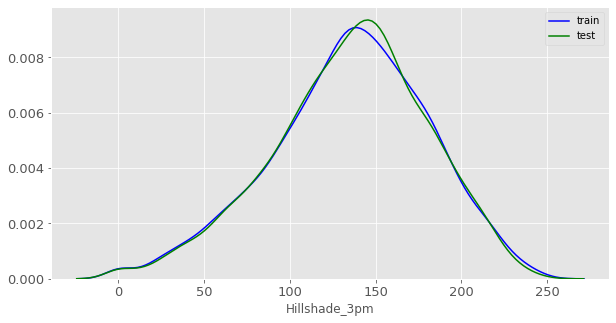

In [105]:
col='Hillshade_3pm'


plt.figure(figsize=(10,5))
sns.distplot(train[col], color='b', label='train', hist=False)
sns.distplot(test[col], color='g', label='test', hist=False)
plt.legend(loc='best')
plt.show()

<Figure size 864x432 with 0 Axes>

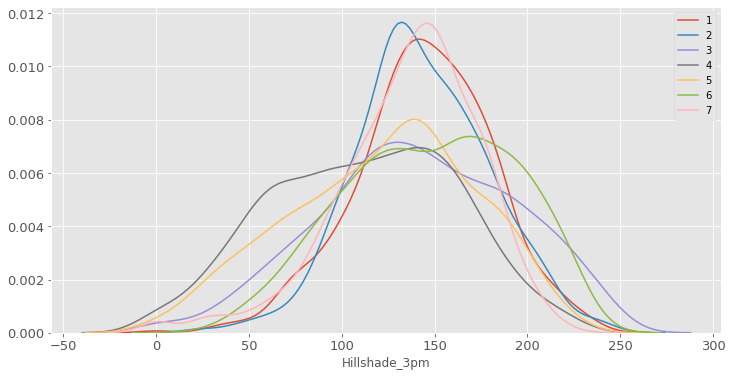

In [106]:
target = 'Cover_Type'
plt.figure(figsize=(12,6))
sns.distplot(train[col][train[target] == 1], label='1' , hist=False)
sns.distplot(train[col][train[target] == 2], label='2' , hist=False)
sns.distplot(train[col][train[target] == 3], label='3' , hist=False)
sns.distplot(train[col][train[target] == 4], label='4' , hist=False)
sns.distplot(train[col][train[target] == 5], label='5' , hist=False)
sns.distplot(train[col][train[target] == 6], label='6' , hist=False)
sns.distplot(train[col][train[target] == 7], label='7' , hist=False)
plt.legend(loc='best')
plt.show()

## Analysis on Horizontal_Distance_To_Fire_Points

<Figure size 720x360 with 0 Axes>

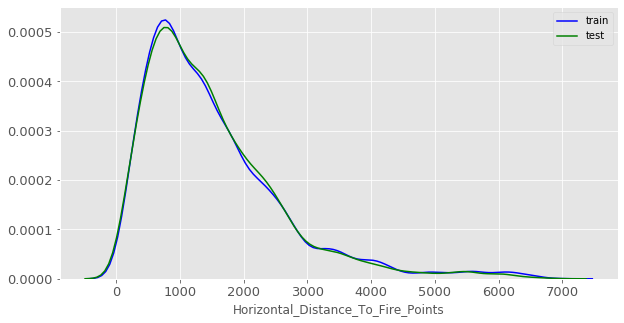

In [107]:
col='Horizontal_Distance_To_Fire_Points'


plt.figure(figsize=(10,5))
sns.distplot(train[col], color='b', label='train', hist=False)
sns.distplot(test[col], color='g', label='test', hist=False)
plt.legend(loc='best')
plt.show()

<Figure size 864x432 with 0 Axes>

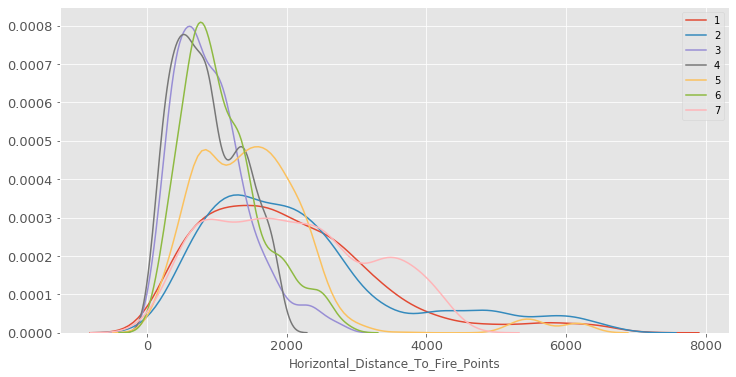

In [108]:
target = 'Cover_Type'
plt.figure(figsize=(12,6))
sns.distplot(train[col][train[target] == 1], label='1' , hist=False)
sns.distplot(train[col][train[target] == 2], label='2' , hist=False)
sns.distplot(train[col][train[target] == 3], label='3' , hist=False)
sns.distplot(train[col][train[target] == 4], label='4' , hist=False)
sns.distplot(train[col][train[target] == 5], label='5' , hist=False)
sns.distplot(train[col][train[target] == 6], label='6' , hist=False)
sns.distplot(train[col][train[target] == 7], label='7' , hist=False)
plt.legend(loc='best')
plt.show()

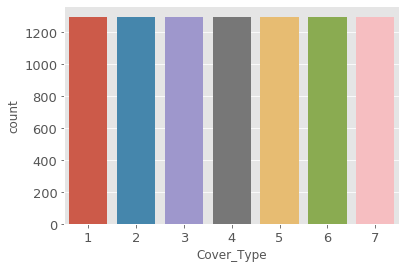

In [110]:
#Check Data imbalance
sns.countplot(train['Cover_Type'])

In [119]:
#train.to_csv('train_clean.csv')
#test.to_csv('test_clean.csv')

## Multicollinearity in data

<Figure size 936x720 with 0 Axes>

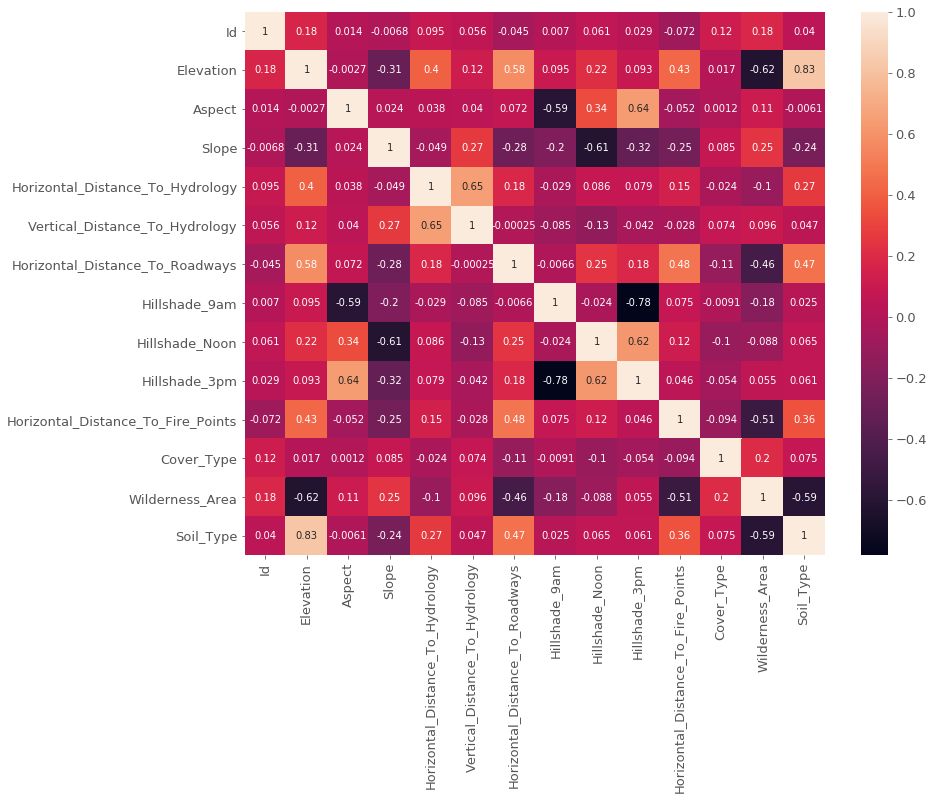

In [126]:
#Multicollinearity
X=train.values
X=pd.DataFrame(X)
X.columns=['Id', 'Elevation', 'Aspect', 'Slope',
       'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology',
       'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon',
       'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points', 'Cover_Type',
       'Wilderness_Area', 'Soil_Type']
corr=X.corr()
plt.figure(figsize=(13,10))
sns.heatmap(corr,annot=True)

***conclusion :***

1. After doing we have got an idea about the nature of data also we have got an hidden pattern in elevation column.
2. For modelling key takeway from this eda is that the data is skewed and highly multicollinear and ML model like logistic regression performs very poor on such kind of data hence we need to go forward with tree based  methods without wasting any time.